## Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Python Libraries

In [ ]:
import numpy as np
import pandas as pd
import os
from itertools import combinations
from sklearn.preprocessing import LabelEncoder
import missingno
import warnings
warnings.filterwarnings('ignore')

## Preprocessing data

#### Load Data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Classroom/IS252/ad_10000records.csv")
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Hour,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,21.0,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,17.0,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,10.0,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,14.0,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,10.0,1


In [ ]:
print("Số cột của dữ liệu: ", data.shape[1])
print("Số dòng của dữ liệu: ", data.shape[0])

Số cột của dữ liệu:  10
Số dòng của dữ liệu:  10000


#### Check data_type and null_value


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       9997 non-null   float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      9998 non-null   float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    9999 non-null   object 
 7   Country                   10000 non-null  object 
 8   Hour                      9997 non-null   float64
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 781.4+ KB


In [ ]:
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
numerical_features = data.select_dtypes(include=['number']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['Ad Topic Line', 'City', 'Gender', 'Country']
Numerical Features: ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Hour', 'Clicked on Ad']


In [ ]:
for df_obj in categorical_features:
    data[df_obj] = data[df_obj].astype("category")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Daily Time Spent on Site  10000 non-null  float64 
 1   Age                       9997 non-null   float64 
 2   Area Income               10000 non-null  float64 
 3   Daily Internet Usage      9998 non-null   float64 
 4   Ad Topic Line             10000 non-null  category
 5   City                      10000 non-null  category
 6   Gender                    9999 non-null   category
 7   Country                   10000 non-null  category
 8   Hour                      9997 non-null   float64 
 9   Clicked on Ad             10000 non-null  int64   
dtypes: category(4), float64(5), int64(1)
memory usage: 587.8 KB


#### Convert to Category Codes

In [ ]:
for cat_col in categorical_features:
    print(data[cat_col].value_counts())
    data[cat_col] = data[cat_col].cat.codes
    data[cat_col] = data[cat_col].astype("category")

Ad Topic Line
Cloned explicit middleware                344
Streamlined homogeneous analyzer          212
Business-focused transitional solution    207
Sharable reciprocal project               187
Intuitive exuding service-desk            173
                                         ... 
Profound stable product                     1
Progressive 24hour forecast                 1
Progressive empowering alliance             1
Public-key zero-defect analyzer             1
Visionary multi-tasking alliance            1
Name: count, Length: 559, dtype: int64
City
Hubbardmouth         336
West Brandonton      275
Lisafort             261
Wintersfort          230
Stewartbury          207
                    ... 
East Troyhaven         1
South Ronald           1
South Pamela           1
Josephberg             1
South Christopher      1
Name: count, Length: 521, dtype: int64
Gender
Female    5375
Male      4624
Name: count, dtype: int64
Country
Australia         388
Czech Republic    330
Turkey 

#### Encoding cat variables

In [ ]:
label_encoders = {}
for column in categorical_features:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [ ]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Hour,Clicked on Ad
0,62.26,32.0,69481.85,172.83,96,234,2,174,21.0,0
1,41.73,31.0,61840.26,207.17,301,460,2,166,17.0,0
2,44.40,30.0,57877.15,172.83,484,379,1,71,10.0,0
3,59.88,28.0,56180.93,207.17,24,269,1,205,14.0,0
4,49.21,30.0,54324.73,201.58,484,495,1,149,10.0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       9997 non-null   float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      9998 non-null   float64
 4   Ad Topic Line             10000 non-null  int64  
 5   City                      10000 non-null  int64  
 6   Gender                    10000 non-null  int64  
 7   Country                   10000 non-null  int64  
 8   Hour                      9997 non-null   float64
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 781.4 KB


## Xử lý null bằng giá trị trung bình

In [ ]:
data.fillna(data.mean(), inplace=True)

## ĐỘ tương quan

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

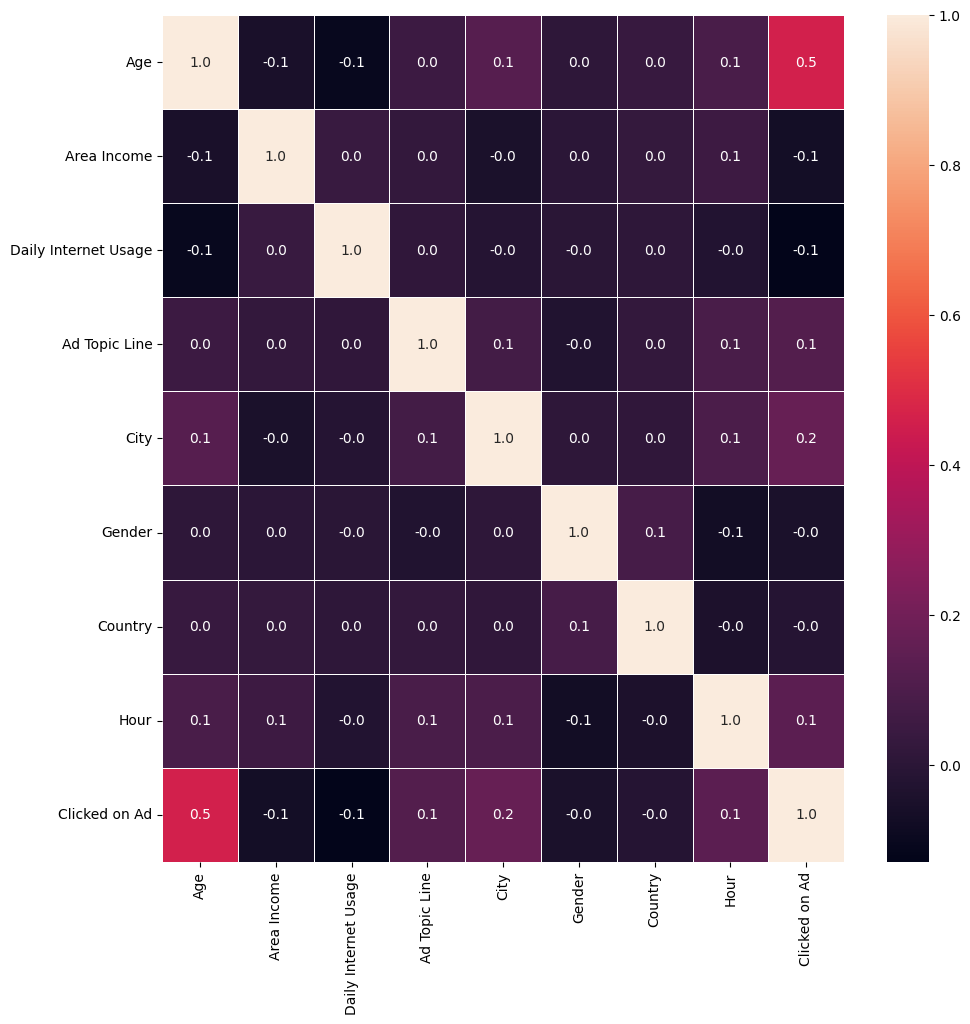

In [ ]:
f,ax = plt.subplots(figsize=(11, 11))
sns.heatmap(data.iloc[:, 1:].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Binning

In [ ]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Hour,Clicked on Ad
0,62.26,32.0,69481.85,172.83,96,234,2,174,21.0,0
1,41.73,31.0,61840.26,207.17,301,460,2,166,17.0,0
2,44.40,30.0,57877.15,172.83,484,379,1,71,10.0,0
3,59.88,28.0,56180.93,207.17,24,269,1,205,14.0,0
4,49.21,30.0,54324.73,201.58,484,495,1,149,10.0,1


In [ ]:
# Tính giá trị nhỏ nhất, lớn nhất và trung bình của cột Age
min = data['Age'].min()
max = data['Age'].max()
mean = data['Age'].mean()

min, max, mean

(19.0, 60.0, 35.93728118435531)

In [ ]:
bins = [19, 30, 50, 60]
labels = ['(19-30)', '(30-50)', '(50-60)']

In [ ]:
df = data.copy()

In [ ]:
# Tạo cột mới chứa kết quả binning
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

df_one_hot = pd.get_dummies(df['Age_Group'], prefix='Age_Group')
for col in df_one_hot.columns:
    df_one_hot[col] = df_one_hot[col].astype(int)

# Gộp kết quả vào DataFrame ban đầu
df = pd.concat([df, df_one_hot], axis=1)

## Smoothy

In [ ]:
bin_means = data.groupby('Age_Group')['Age'].transform('mean')

In [ ]:
data['Age'] = bin_means

## Min max normalize

In [ ]:
columns_to_normalize = ['Daily Time Spent on Site', 'Age', 'Area Income',
                        'Daily Internet Usage', 'Ad Topic Line', 'City', 'Country', 'Hour']

In [ ]:
df_normalized = data.copy()
df_normalized[columns_to_normalize] = (data[columns_to_normalize] - data[columns_to_normalize].min()) / \
                                      (data[columns_to_normalize].max() - data[columns_to_normalize].min())

## Gom cụm


Centroid ban đầu:
Centroid 1: [-1.38875032 -1.69557801]
Centroid 2: [-0.83210068  0.09605024]
Centroid 3: [-1.45294143  0.92459596]
Centroid 4: [ 1.28449099 -0.0827186 ]
Centroid 5: [ 0.10896063 -0.11894872]
Centroid 6: [-1.64379974 -1.99346886]

=== Gom cụm lần 1 ===
Centroid mới của cụm 1: [-0.91941296 -1.47393245]
Centroid mới của cụm 2: [-0.95886839  0.11790723]
Centroid mới của cụm 3: [-1.12101622  1.07950256]
Centroid mới của cụm 4: [1.18910432 0.10947226]
Centroid mới của cụm 5: [ 0.18645634 -0.01083466]
Centroid mới của cụm 6: [-1.45386918 -2.37616469]

Centroid thay đổi, tiếp tục lặp...

=== Gom cụm lần 2 ===
Centroid mới của cụm 1: [-0.5918327  -1.40538909]
Centroid mới của cụm 2: [-1.07860932  0.1071306 ]
Centroid mới của cụm 3: [-0.8312626   1.20999578]
Centroid mới của cụm 4: [1.17268709 0.22161347]
Centroid mới của cụm 5: [0.19496978 0.04629111]
Centroid mới của cụm 6: [-1.0024591  -2.41433386]

Centroid thay đổi, tiếp tục lặp...

=== Gom cụm lần 3 ===
Centroid mới của c

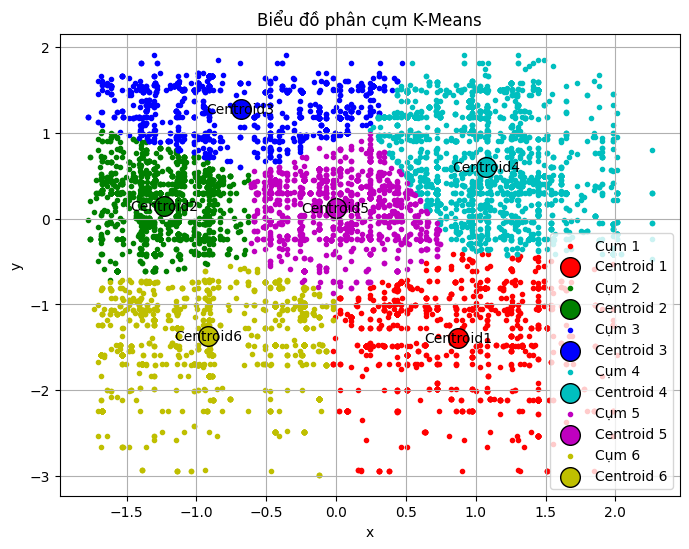

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Hàm tính khoảng cách Euclidean giữa các điểm và centroid
def calculate_distance(point, centroid):
    return np.sqrt(np.sum((point - centroid) ** 2))

# Thuật toán K-Means
def kmeans(X, k, centroids):
    prev_centroids = centroids.copy()
    iteration = 0

    while True:
        iteration += 1
        print(f"\n=== Gom cụm lần {iteration} ===")

        clusters = [[] for _ in range(k)]
        for point in X:
            distances = [calculate_distance(point, centroid) for centroid in centroids]
            closest_centroid = np.argmin(distances)
            clusters[closest_centroid].append(point)

        new_centroids = []
        for i in range(k):
            if len(clusters[i]) > 0:
                new_centroid = np.mean(clusters[i], axis=0)
            else:
                new_centroid = centroids[i]
            new_centroids.append(new_centroid)
            print(f"Centroid mới của cụm {i + 1}: {new_centroid}")

        if np.allclose(new_centroids, prev_centroids):
            print("\nCentroid không thay đổi, thuật toán dừng lại.")
            break
        else:
            print("\nCentroid thay đổi, tiếp tục lặp...")

        prev_centroids = new_centroids.copy()
        centroids = np.array(new_centroids)

    return clusters, centroids

def plot_clusters_with_labels(X, clusters, centroids):
    colors = ['r', 'g', 'b', 'c', 'm', 'y']  # Mở rộng màu sắc cho nhiều cụm hơn
    plt.figure(figsize=(8, 6))

    for i, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        if len(cluster) > 0:
            plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i % len(colors)],marker='.', label=f'Cụm {i + 1}')

            plt.scatter(
                centroids[i][0], centroids[i][1],
                c=colors[i % len(colors)], marker='o', edgecolor='black', s=200, label=f'Centroid {i + 1}'
            )
            plt.text(centroids[i][0], centroids[i][1] - 0.05, f"Centroid{i + 1}",
                     fontsize=10, color='black', ha='center')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Biểu đồ phân cụm K-Means')
    plt.legend()
    plt.grid()
    plt.show()

# Chọn k là số lượng cụm
k = 6

# Lựa chọn các cột số để phân cụm
X = data[['Daily Internet Usage', 'Area Income']].values

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chọn ngẫu nhiên k điểm từ dữ liệu đã chuẩn hóa làm các centroid ban đầu
centroids = X_scaled[random.sample(range(len(X_scaled)), k)]
print("\nCentroid ban đầu:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i + 1}: {centroid}")

# Áp dụng thuật toán K-Means
clusters, final_centroids = kmeans(X_scaled, k, centroids)

print("\nKết quả phân cụm cuối cùng:")
for i, cluster in enumerate(clusters):
    print(f"Cụm {i + 1}: {cluster}")

print("\nCác centroid cuối cùng:")
print(final_centroids)

# Vẽ đồ thị
plot_clusters_with_labels(X_scaled, clusters, final_centroids)
